## Circle, Square, Sieves of Eratosthenes




Execute single cell with "*strg + enter*"

In [381]:
class Circle():
    """Circle Class with
       getPerimeter()
       getArea()
       isInside(x,y, x_coord, y_coord, plot_=True)       
    """
    
    def __init__(self, r_):
        self.radius_ = r_
        
    def getPerimeter(self):
        return 2*self.radius_*3.14

    def getArea(self):
        return self.radius_**2*3.14  
            
    def plot_circle(self):
        from matplotlib.patches import Circle
        import matplotlib.pyplot as plt

        fig_, ax_ = plt.subplots(1)
        circle_ = Circle((self.x_coord_circle_ ,self.y_coord_circle_),
                         self.radius_, facecolor='None', edgecolor='r')
        ax_.add_patch(circle_)
        plt.axis("equal")
        plt.scatter(self.x_ ,self.y_ )
        plt.grid(linestyle='--')
    
    def isInside(self, x_, y_, x_coord_circle_=0, y_coord_circle_=0, plot_=True):
        self.x_ = x_
        self.y_ = y_
        self.plot_ = plot_
        self.x_coord_circle_ = x_coord_circle_
        self.y_coord_circle_ = y_coord_circle_        
        d_dist_center_x_ = self.x_ - self.x_coord_circle_
        d_dist_center_y_ = self.y_ - self.y_coord_circle_

        

        # Formula Pythagoras: a^2 + b^2 = c^2 
        # Distance Center = radius
        # radius**2 == c^2 --> point inside circle 
        # Source = https://www.youtube.com/watch?v=S6BHQMk8C_A        
        if ((d_dist_center_x_**2 + d_dist_center_y_**2) <= self.radius_**2):
            if self.plot_ == True:
                self.plot_circle()                
            return True, print('Point [{:.1f}, {:.1f}] lies inside circle'.format(self.x_,  self.y_)) 
        else:
            if self.plot_ == True:
                self.plot_circle()
            return False, print('Point [{:.1f}, {:.1f}] lies outside circle' .format(self.x_,  self.y_))
        
    def fitsInsideCircle(self, length_):
        
        if Square(length_).getArea() > self.getArea():
            return True, print('Square does not fit in circle')
        else:
             return False, print('Square does fit in circle')       
        

In [382]:
class Square():
    """Square Class with
       getPerimeter()
       getArea()
       isInside(x,y, x_coord, y_coord, plot_=True)
    """
    
    def __init__(self, l_):
        self.length_ = l_
        
    def getPerimeter(self):
        return self.length_*4

    def getArea(self):
        return self.length_**2
            
    def plot_square(self):
        from matplotlib.patches import Rectangle
        import matplotlib.pyplot as plt

        fig_, ax_ = plt.subplots(1)
        rectangle_ = Rectangle((self.x_coord_square_ ,self.y_coord_square_),width=self.length_, height=self.length_,
                               edgecolor='r',facecolor='none')
        
        ax_.add_patch(rectangle_)
        plt.axis("equal")
        plt.scatter(self.x_ ,self.y_ )
        plt.grid(linestyle='--')
    
    def isInside(self, x_, y_, x_coord_square_=0, y_coord_square_=0, plot_=True):
        import numpy as np
  
        self.x_ = x_
        self.y_ = y_
        self.plot_ = plot_
        self.x_coord_square_ = x_coord_square_ 
        self.y_coord_square_ = y_coord_square_ 
        
        
        x1_bt_left_ = self.x_coord_square_ - 0.5*self.length_
        y1_bt_left_ = self.y_coord_square_ - 0.5*self.length_        
        x2_tp_right_ = self.x_coord_square_ + 0.5*self.length_
        y2_tp_right_ = self.y_coord_square_ + 0.5*self.length_
        
        
        # Point lies within Square if x-coord, y-coord lies within range of 
        # [x1_bt_left_, y1_bt_left_] and [x2_tp_right_, y2_tp_right_]
        # Source = https://www.geeksforgeeks.org/check-if-a-point-lies-on-or-inside-a-rectangle-set-2/           
        
        if (self.x_ > x1_bt_left_ and self.x_ < x2_tp_right_ and 
            self.y_  > y1_bt_left_ and self.y_ < y2_tp_right_):
            if self.plot_ == True:
                self.plot_square() 
            return True, print('Point [{:.1f}, {:.1f}] lies inside square'.format(self.x_,  self.y_))               
        else :
            if self.plot_ == True:
                self.plot_square() 
                return False, print('Point [{:.1f}, {:.1f}] lies outside square' .format(self.x_,  self.y_))  
   
    def fitsInsideSquare(self, radius_):   
        if Circle(radius_).getArea() > self.getArea():
            return True, print('Circle does not fit in square')
        else:
             return False, print('Circle does fit in square')

In [398]:
def siev(int=n):    
    """Sieves of Eratosthenes without boolean approach
       siev(int=n) n --> range from 2:n:1
       Idea: https://www.python-course.eu/numpy_masking.php
    """
    import numpy as np

    # Create array with numbers from 2 to n 
    numbers_ = list(range(2, n+1))
    
    # For n < && == 4
    # Delete 0 and 1 as not primes if n > 4
    if n ==4:
        del numbers_[2]
    elif n >4:
        del numbers_[0]
        del numbers_[1]    

    # Delete higher multiples (sieve of Eratosthenes)
    nmax_ = len(numbers_)
    for i in range(2, nmax_):
        del numbers_[2*i::i]
        
    return n, numbers_    

Area:  200.96
Perimeter:  50.24
Point [2.0, 3.0] lies inside circle
Square does fit in circle


(False, None)

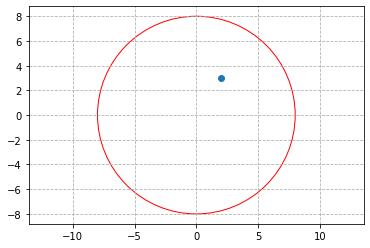

In [390]:
circ = Circle(8)
print('Area: ', circ.getArea())
print('Perimeter: ', circ.getPerimeter())
circ.isInside(2,3, plot_=True)
circ.fitsInsideCircle(.1)

Area:  400
Perimeter:  80
Point [8.0, 6.0] lies inside square
Circle does fit in square


(False, None)

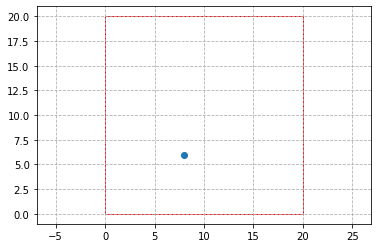

In [391]:
sq = Square(20)
print('Area: ', sq.getArea())
print('Perimeter: ', sq.getPerimeter())
sq.isInside(8,6, plot_=True)
sq.fitsInsideSquare(1)

In [404]:
n, primes = siev(5)
print('Primes in Range from 2 to {:.0f} ' .format(n))
print(primes)

Primes in Range from 2 to 10 
[3, 5, 6, 7, 9]
